In [110]:
import subprocess
from random import random, randint
from nfa_lib import NFA, random_matrix_for_nfa, count_nfa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from tqdm.auto import tqdm as tqdm
import pandas as pd
import pickle
from multiprocessing import Pool, TimeoutError
sns.set(rc={"figure.figsize": (14,10),
            'legend.fontsize': 'x-large',
            'axes.labelsize': 'x-large',
            'axes.titlesize':'x-large',
            'xtick.labelsize':'x-large',
            'ytick.labelsize':'x-large'})

In [155]:
def random_run():
    n_states = randint(20, 200)
    sparsity = round(0.03 * random() + 0.97, 5)
    n_initial = randint(1, min(n_states, 2))
    n_final = randint(1, min(n_states, 3))
    string_length = randint(3, 10)
    rand_matrix = random_matrix_for_nfa(n_states=n_states, sparsity=sparsity, n_initial=n_initial, n_final=n_final)
    rand_nfa = NFA.from_random_matrix(rand_matrix)
    rand_nfa_text = rand_nfa.to_text()
    
    res_array = []
    
    epsilon = round(random() * 95 + 5, 1) # epsilon \in [5, 100]
    kappa_multiple = 1
    phi_multiple = round(2 ** (5 + random() * 5)) # phi_multiple \in [32, 1024]

    cpp_input = f"{string_length} {epsilon} {kappa_multiple} {phi_multiple}\n" + rand_nfa_text
    program = ["timeout", "300", "./cpp/main"]
    result = subprocess.run(program, 
                            stdout=subprocess.PIPE, 
                            input=cpp_input,
                            encoding="utf-8")
    res_dict = {}
    if result.returncode == 0:
        invalid = False
        for line in result.stdout.split("\n"):
            if "Got 0 when" in line or "Empty NFA" in line:
                invalid = True
                break
            l_split = line.split()
            if len(l_split) == 2:
                k, v = l_split
                res_dict[k] = float(v) if "." in v else int(v)
        if not invalid:
            res_dict["n_states"] = len(rand_nfa.states)
            res_dict["sparsity"] = sparsity
            res_dict["str_repr"] = cpp_input
            res_dict["string_len"] = string_length
            res_dict["epsilon"] = epsilon
            res_dict["kappa_multiple"] = kappa_multiple
            res_dict["phi_multiple"] = phi_multiple
            res_array.append(res_dict)


    return res_array

In [156]:
# results = []
samples = 0
errors = []
error_count = 0
n_proc = 6
with Pool(processes=n_proc) as pool:
    while error_count < 3:
        multiproc_results = [pool.apply_async(random_run) 
                             for i in range(6*n_proc)]
        for res_promise in tqdm(multiproc_results):
            res = None
            try:
                res = res_promise.get()
            except TimeoutError:
                continue

            if isinstance(res, Exception):
                errors.append(res)
                error_count += 1
                continue
            else:
                samples += 1
                if res:
                    results.extend(res)

        with open("cpp_random_big.pkl", "wb") as fd:
            pickle.dump(results, fd)
        print(f"Wrote pickle file for {len(results)} results")

100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.33s/it]


Wrote pickle file for 11782 results


100%|███████████████████████████████████████████| 36/36 [05:04<00:00,  8.46s/it]


Wrote pickle file for 11799 results


100%|███████████████████████████████████████████| 36/36 [00:10<00:00,  3.55it/s]


Wrote pickle file for 11823 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.36s/it]


Wrote pickle file for 11845 results


100%|███████████████████████████████████████████| 36/36 [00:38<00:00,  1.06s/it]


Wrote pickle file for 11867 results


100%|███████████████████████████████████████████| 36/36 [00:45<00:00,  1.27s/it]


Wrote pickle file for 11886 results


100%|███████████████████████████████████████████| 36/36 [04:33<00:00,  7.59s/it]


Wrote pickle file for 11908 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.34s/it]


Wrote pickle file for 11925 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.35s/it]


Wrote pickle file for 11945 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.34s/it]


Wrote pickle file for 11960 results


100%|███████████████████████████████████████████| 36/36 [00:09<00:00,  3.92it/s]


Wrote pickle file for 11979 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.34s/it]


Wrote pickle file for 11994 results


100%|███████████████████████████████████████████| 36/36 [00:07<00:00,  4.82it/s]


Wrote pickle file for 12011 results


100%|███████████████████████████████████████████| 36/36 [00:29<00:00,  1.23it/s]


Wrote pickle file for 12029 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.34s/it]


Wrote pickle file for 12049 results


100%|███████████████████████████████████████████| 36/36 [05:00<00:00,  8.34s/it]


Wrote pickle file for 12068 results


 47%|████████████████████▎                      | 17/36 [00:03<00:04,  4.66it/s]Process ForkPoolWorker-23:
Process ForkPoolWorker-22:
Process ForkPoolWorker-20:
 56%|███████████████████████▉                   | 20/36 [03:08<02:30,  9.41s/it]Process ForkPoolWorker-19:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in wor

KeyboardInterrupt: 

In [97]:
with open("cpp_random.pkl", "rb") as fd:
    results = pickle.load(fd)

In [157]:
df = pd.DataFrame(results)

In [158]:
df["rel_error"] = abs(df.estimation - df.bruteforce)/df.bruteforce

In [159]:
df[df["n_states"] > 20]

,retries_per_sample,sample_size,sample_misses,sample_hits,miss_ratio,bruteforce,bruteforce_time,estimation,estimation_time,n_states,sparsity,str_repr,string_len,epsilon,kappa_multiple,phi_multiple,rel_error
11708,342455,129,0,61404,0.000000,32,31,31.7752,64006,138,0.62000,5 18.6 1 941\n138 2 14604\n0 1 10 100 101 102 ...,5,18.6,1,941,0.007025
11709,274189,45,0,9630,0.000000,32,7,32.0000,3591,53,0.66000,5 24.5 1 277\n53 2 1998\n0 1 10 11 12 13 14 15...,5,24.5,1,277,0.000000
11710,312289,81,0,27135,0.000000,32,7,32.5432,1793,129,0.94000,5 21.1 1 986\n129 2 1997\n0 1 10 100 101 102 1...,5,21.1,1,986,0.016975
11711,327232,102,24542,27744,0.884588,1024,168,957.3330,27950,30,0.53000,10 27.1 1 75\n30 2 851\n0 1 10 11 12 13 14 15 ...,10,27.1,1,75,0.065104
11712,224786,21,6889,4578,1.504810,16,4,16.0000,320,135,0.91000,4 43.6 1 60\n135 2 3347\n0 1 10 100 101 102 10...,4,43.6,1,60,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,303748,71,0,37843,0.000000,971,68,988.5940,2948,116,0.98706,10 75.5 1 409\n116 2 359\n0 1 100 101 102 103 ...,10,75.5,1,409,0.018119
12074,117299,4,231,208,1.110580,21,1,23.5000,3,93,0.98084,6 81.7 1 67\n93 2 341\n0 1 10 100 11 13 14 15 ...,6,81.7,1,67,0.119048
12075,349133,143,0,77506,0.000000,510,63,502.5200,3606,176,0.98609,9 34.2 1 491\n176 2 870\n0 1 10 100 101 103 10...,9,34.2,1,491,0.014667
12077,316172,86,52271,39904,1.309920,128,27,127.0960,2661,164,0.98221,7 38.1 1 64\n164 2 976\n0 1 10 100 101 102 103...,7,38.1,1,64,0.007062


In [173]:
df[df.epsilon < 80].rel_error.quantile(.99)

0.20911017124368672

<IPython.core.display.Javascript object>


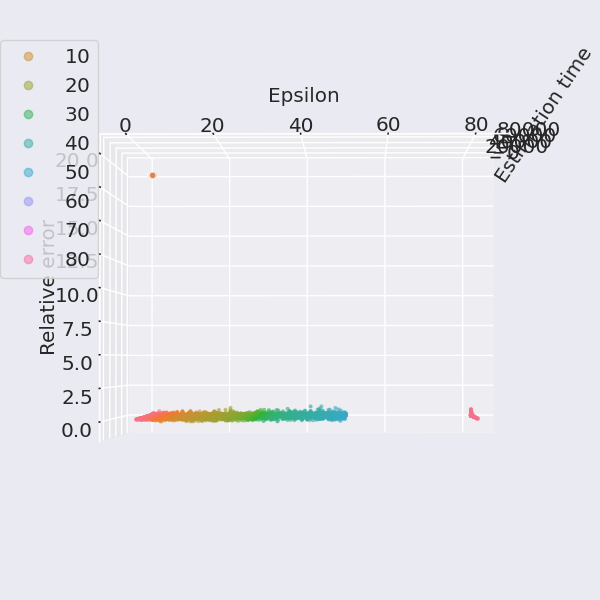

In [100]:
%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df.estimation_time, df.epsilon, df.rel_error, s=4, c=df.epsilon,
                marker='o', cmap=cmap, alpha=0.5)
ax.set_xlabel('Estimation time')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Relative error')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(0.18, 0.95), loc=0)

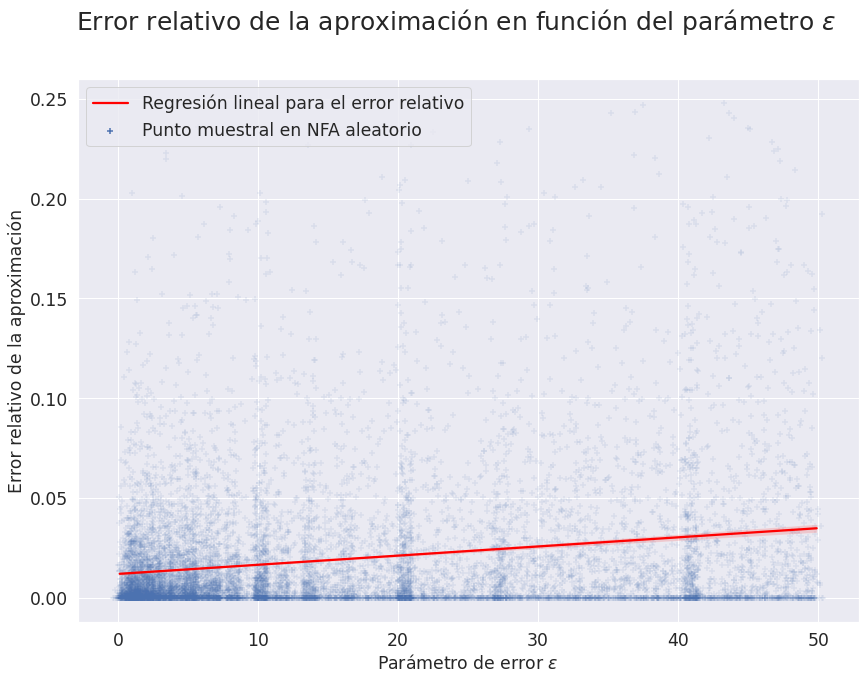

In [141]:
sns.regplot(data=df[(df.epsilon < 50) & (df.rel_error<0.25)], x="epsilon", y="rel_error", 
            scatter_kws={"alpha": 0.1}, marker="+", x_jitter=0.5,
            line_kws={"color": "red"})
plt.ylabel("Error relativo de la aproximación")
plt.xlabel("Parámetro de error $\epsilon$")
plt.suptitle("Error relativo de la aproximación en función del parámetro $\epsilon$", fontsize=25)
leg = plt.legend(["Regresión lineal para el error relativo", "Punto muestral en NFA aleatorio"])

for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [193]:
df["kappa"] = df.n_states * df.string_len / (df.epsilon * df.phi_multiple)

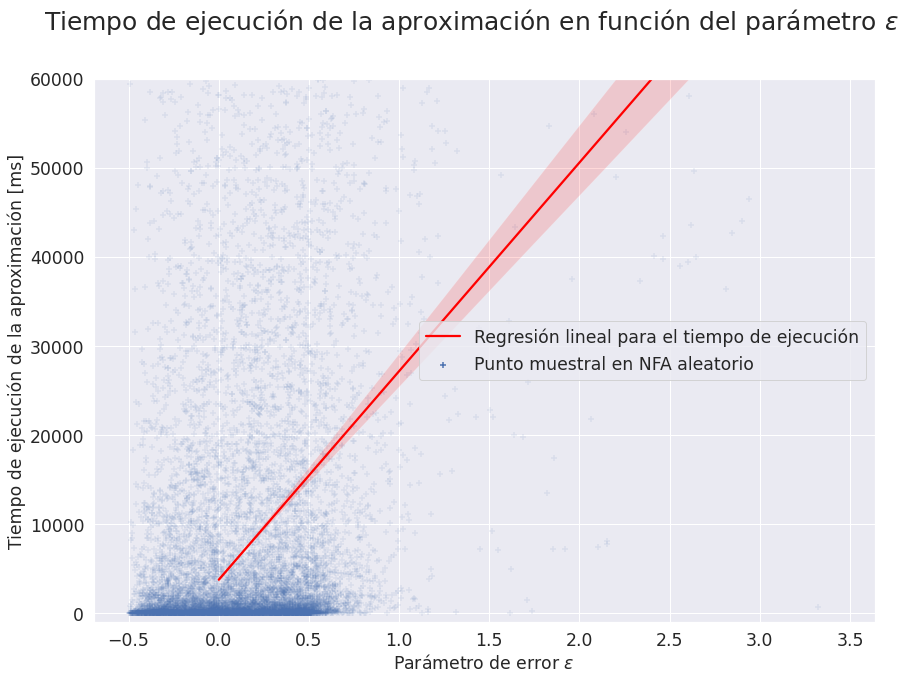

In [194]:
sns.regplot(data=df[(df.epsilon < 50) & (df.estimation_time<60000)], x="kappa", y="estimation_time", 
            scatter_kws={"alpha": 0.1}, marker="+", x_jitter=0.5,
            line_kws={"color": "red"})
plt.ylabel("Tiempo de ejecución de la aproximación [ms]")
plt.xlabel("Parámetro de error $\epsilon$")
plt.ylim(-1000,60000)
plt.suptitle("Tiempo de ejecución de la aproximación en función del parámetro $\epsilon$", fontsize=25)
leg = plt.legend(["Regresión lineal para el tiempo de ejecución", "Punto muestral en NFA aleatorio"])

for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [30]:
df[(df.rel_error > 0) & (df.epsilon < 3)].sort_values(by="rel_error", ascending=False).drop(columns=["str_repr"])

,retries_per_sample,sample_size,sample_misses,sample_hits,miss_ratio,bruteforce,bruteforce_time,estimation,estimation_time,n_states,sparsity,string_len,epsilon,kappa_multiple,phi_multiple,rel_error
9279,245709,29,0,290,0.000000,64,0,86.1260,1,2,0.56,6,2.28,1,450,0.345719
10906,420798,432,0,17280,0.000000,128,0,102.0030,322,6,0.66,7,0.73,1,350,0.203102
10916,330937,108,124,4320,0.028704,128,0,104.8930,97,6,0.66,7,2.93,1,175,0.180523
9243,254084,33,97,330,0.293939,64,0,74.9217,3,2,0.56,6,2.05,1,125,0.170652
5847,290639,58,0,1508,0.000000,16,0,13.3621,6,6,0.96,6,2.93,1,350,0.164869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,456815,753,0,47439,0.000000,647,15,646.9790,478,7,0.88,12,1.02,1,500,0.000032
9156,460739,800,0,88800,0.000000,488,15,488.0130,1493,11,0.89,12,1.71,1,300,0.000027
5877,494126,1339,19,137917,0.000138,7936,217,7936.1900,6045,10,0.90,13,1.02,1,250,0.000024
104,594950,6343,0,926078,0.000000,4096,175,4096.0800,59010,13,0.54,12,0.28,1,450,0.000020


In [40]:
%%time
probe = df.loc[9279]
cpp_input_nfa = probe.str_repr
cpp_input_nfa = cpp_input_nfa[cpp_input_nfa.find("\n") :]
str_len = probe.string_len
ests = []
for phi in tqdm([25, 50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400, 450, 500]):
    eps = round(100/phi, 5)
    cpp_input = f'{str_len} {eps} 1 {phi}\n{cpp_input_nfa}'
    for i in range(50):
        result = subprocess.run(["timeout", "300", "./cpp/main"], 
                                    stdout=subprocess.PIPE, 
                                    input=cpp_input,
                                    encoding="utf-8")
        res_dict2 = {}
        if result.returncode == 0:
            invalid = False
            for line in result.stdout.split("\n"):
                if "Got 0 when" in line or "Empty NFA" in line:
                    print(line)
                    invalid = True
                    break
                l_split = line.split()
                if len(l_split) == 2:
                    k, v = l_split
                    res_dict2[k] = float(v) if "." in v else int(v)
            if not invalid:
                res_dict2["epsilon"] = eps
                res_dict2["phi_multiple"] = phi
                ests.append(res_dict2)

100%|███████████████████████████████████████████| 14/14 [00:11<00:00,  1.19it/s]

CPU times: user 313 ms, sys: 2.68 s, total: 2.99 s
Wall time: 11.8 s


In [41]:
df_probe = pd.DataFrame(ests)

In [42]:
df_probe["rel_error"] = abs(df_probe.estimation - probe.bruteforce)/probe.bruteforce

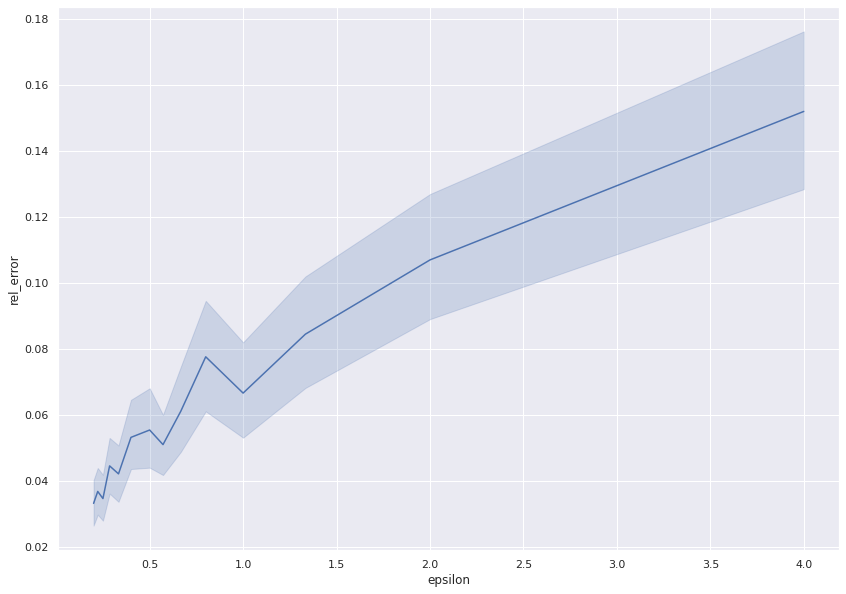

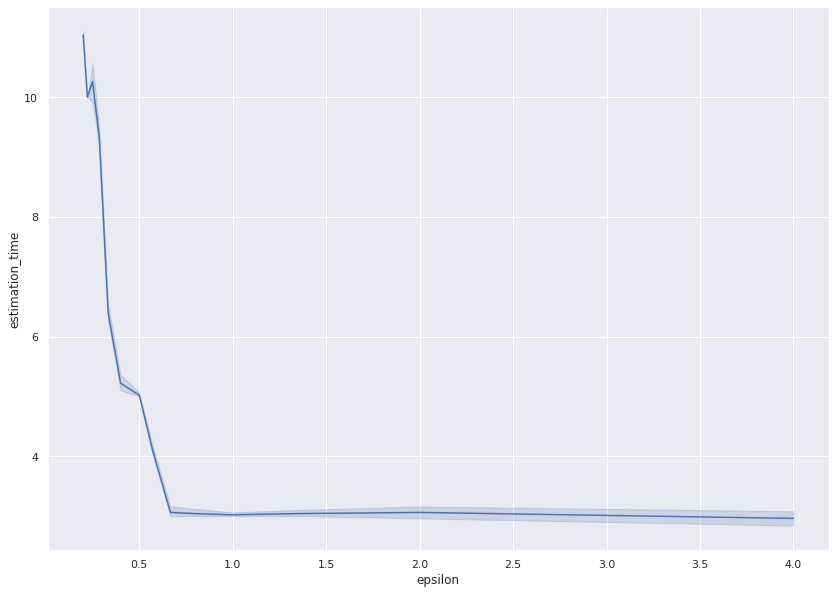

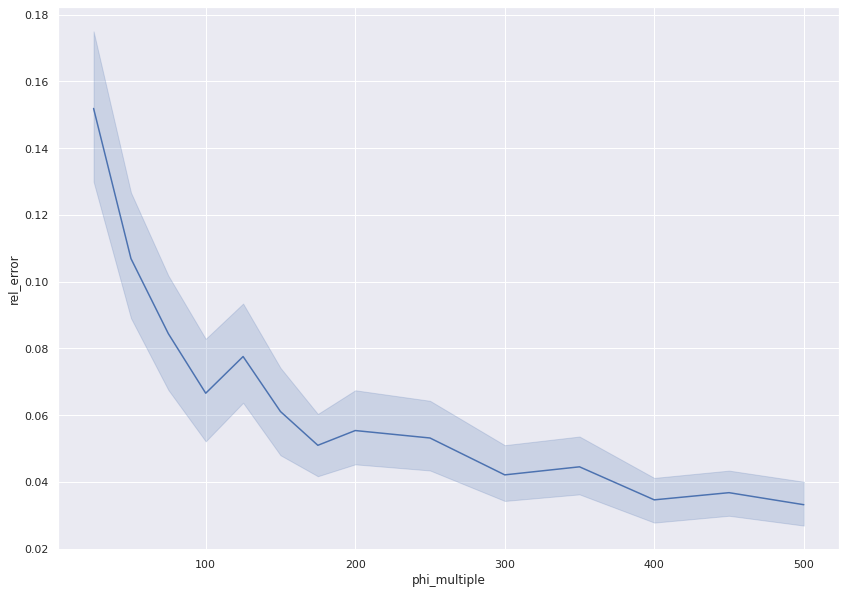

<AxesSubplot:xlabel='phi_multiple', ylabel='estimation_time'>

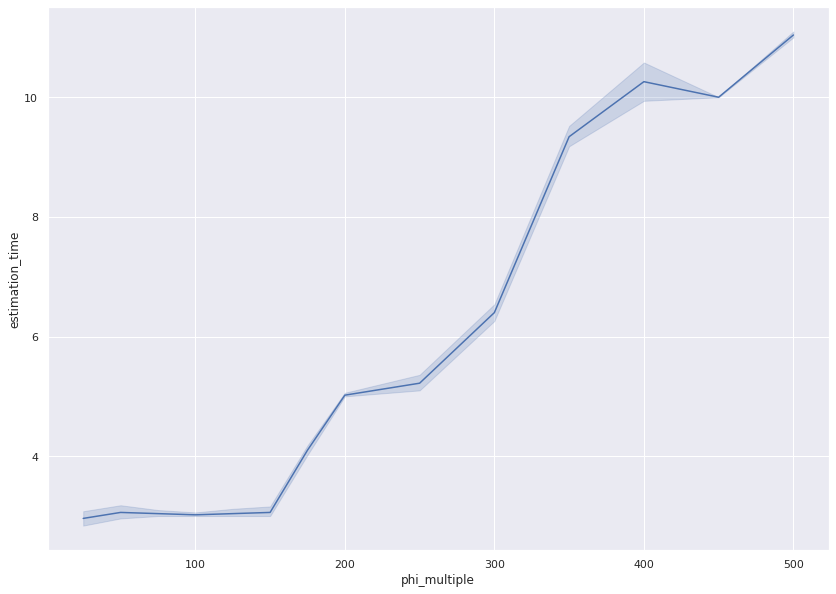

In [43]:
%matplotlib inline
sns.set(rc={"figure.figsize": (14,10)})
sns.lineplot(data=df_probe, x="epsilon", y="rel_error")
plt.show()
sns.lineplot(data=df_probe, x="epsilon", y="estimation_time")
plt.show()
sns.lineplot(data=df_probe, x="phi_multiple", y="rel_error")
plt.show()
sns.lineplot(data=df_probe, x="phi_multiple", y="estimation_time")

# Pentanacci NFA

In [86]:
rand_matrix = np.array(
   [[0, 0, 1, 0, 1, 0],
   [0, 0, 0, 0, 0, 0],
   [0, 1, 0, 1, 0, 0],
   [0, 1, 0, 0, 1, 0],
   [0, 0, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 0],
   [1, 0, 0, 0, 1, 0],
   [1, 0, 0, 0, 0, 1],
   [0, 1, 1, 1, 0, 0],
   [0, 0, 0, 0, 0, 0],
   [0, 1, 0, 1, 0, 1],
   [0, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1],
   [1, 0, 0, 0, 1, 0]])

array([[0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0]])

In [78]:
data = [rand_nfa.bruteforce_count_only(i) for i in range(26)]

In [81]:
[data[i+1] / data[i] for i in range(1, 25)]

[2.0,
 3.5,
 2.142857142857143,
 1.8666666666666667,
 2.0,
 1.9821428571428572,
 1.954954954954955,
 1.9631336405529953,
 1.9671361502347418,
 1.9665871121718377,
 1.9660194174757282,
 1.9657407407407408,
 1.965928717224054,
 1.9659771583739318,
 1.9659571010724732,
 1.965946191676654,
 1.9659449232709691,
 1.9659484602224122,
 1.965948802184324,
 1.9659483110412075,
 1.9659481587913195,
 1.9659481928633655,
 1.9659482494953409,
 1.9659482458453843]

In [82]:
data

[0,
 1,
 2,
 7,
 15,
 28,
 56,
 111,
 217,
 426,
 838,
 1648,
 3240,
 6369,
 12521,
 24616,
 48394,
 95140,
 187040,
 367711,
 722901,
 1421186,
 2793978,
 5492816,
 10798592,
 21229473]

In [85]:
print(rand_nfa.to_text())

6 2 20
0 1 2 3 4 5
0 0 0 1 0 1
1 0 0 0 1 0
0 1
0 0 4
0 0 2
0 1 4
0 1 0
1 1 5
1 1 0
2 0 1
2 0 3
2 1 2
2 1 1
2 1 3
3 0 4
3 0 1
4 1 5
4 1 1
4 1 3
5 0 0
5 0 1
5 0 3
5 1 2


In [56]:
# res_array = []
for rep in range(50):
    for str_len in tqdm(range(20, 26)):
        cpp_input = f'{str_len} 0.5 1 500\n2 2 4\n0 1\n0 1\n0 1\n0 1\n0 0 1\n0 0 0\n1 0 0\n1 1 0'

        program = ["timeout", "90", "./cpp/main", "0"]
        result = subprocess.run(program, 
                                stdout=subprocess.PIPE, 
                                input=cpp_input,
                                encoding="utf-8")
        res_dict = {}
        if result.returncode == 0:
            invalid = False
            for line in result.stdout.split("\n"):
                if "Got 0 when" in line or "Empty NFA" in line:
                    invalid = True
                    break
                l_split = line.split()
                if len(l_split) == 2:
                    k, v = l_split
                    res_dict[k] = float(v) if "." in v else int(v)
            if not invalid:
                res_dict["str_len"] = str_len
                res_array.append(res_dict)

100%|█████████████████████████████████████████████| 6/6 [00:06<00:00,  1.04s/it]


In [11]:
res_array

[{'retries_per_sample': 188512,
  'sample_size': 12,
  'sample_misses': 0,
  'sample_hits': 24,
  'miss_ratio': 0,
  'bruteforce': 2,
  'bruteforce_time': 0,
  'estimation': 2,
  'estimation_time': 0,
  'str_len': 2},
 {'retries_per_sample': 233442,
  'sample_size': 24,
  'sample_misses': 0,
  'sample_hits': 72,
  'miss_ratio': 0,
  'bruteforce': 2,
  'bruteforce_time': 0,
  'estimation': 2,
  'estimation_time': 0,
  'str_len': 3},
 {'retries_per_sample': 278372,
  'sample_size': 48,
  'sample_misses': 0,
  'sample_hits': 240,
  'miss_ratio': 0,
  'bruteforce': 4,
  'bruteforce_time': 0,
  'estimation': 4,
  'estimation_time': 0,
  'str_len': 4},
 {'retries_per_sample': 311484,
  'sample_size': 80,
  'sample_misses': 0,
  'sample_hits': 560,
  'miss_ratio': 0,
  'bruteforce': 6,
  'bruteforce_time': 0,
  'estimation': 5.9,
  'estimation_time': 1,
  'str_len': 5},
 {'retries_per_sample': 337767,
  'sample_size': 120,
  'sample_misses': 0,
  'sample_hits': 1080,
  'miss_ratio': 0,
  'bru

In [57]:
df = pd.DataFrame(res_array)

In [92]:
df["rel_error"] = abs(df.estimation - df.bruteforce)/df.bruteforce

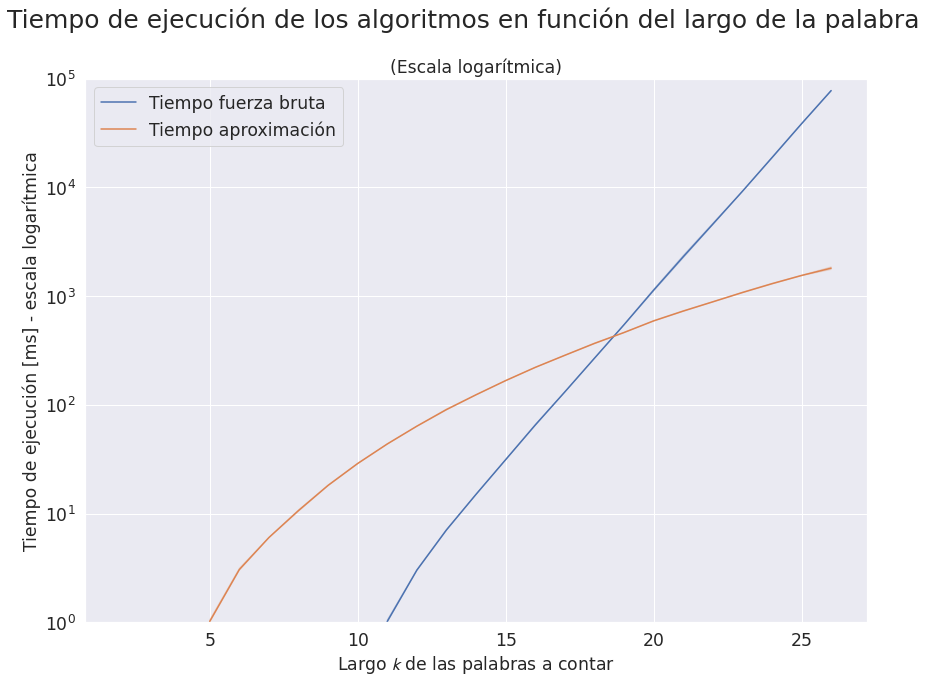

In [96]:
sns.lineplot(data=df, x="str_len", y="bruteforce_time")
sns.lineplot(data=df, x="str_len", y="estimation_time")
plt.yscale("log")
plt.ylim(1, 1e5)
plt.legend(["Tiempo fuerza bruta", "Tiempo aproximación"])
plt.ylabel("Tiempo de ejecución [ms] - escala logarítmica")
plt.xlabel("Largo $\mathcal{k}$ de las palabras a contar")
plt.suptitle("Tiempo de ejecución de los algoritmos en función del largo de la palabra", fontsize=25)
plt.title("(Escala logarítmica)");

Text(0.5, 0.98, 'Error relativo de la aproximación en función del largo de la palabra')

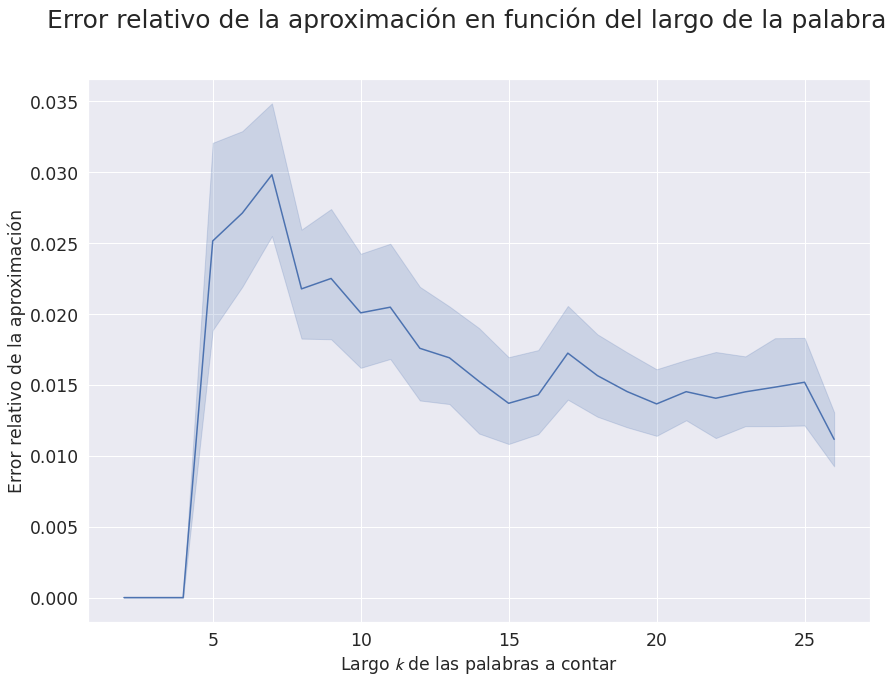

In [95]:
sns.lineplot(data=df, x="str_len", y="rel_error")
plt.ylabel("Error relativo de la aproximación")
plt.xlabel("Largo $\mathcal{k}$ de las palabras a contar")
plt.suptitle("Error relativo de la aproximación en función del largo de la palabra", fontsize=25)